<a href="https://colab.research.google.com/github/ousseeema/data-science/blob/main/exercice_lineaire_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [4]:
df = pd.read_csv('auto.csv')

In [30]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


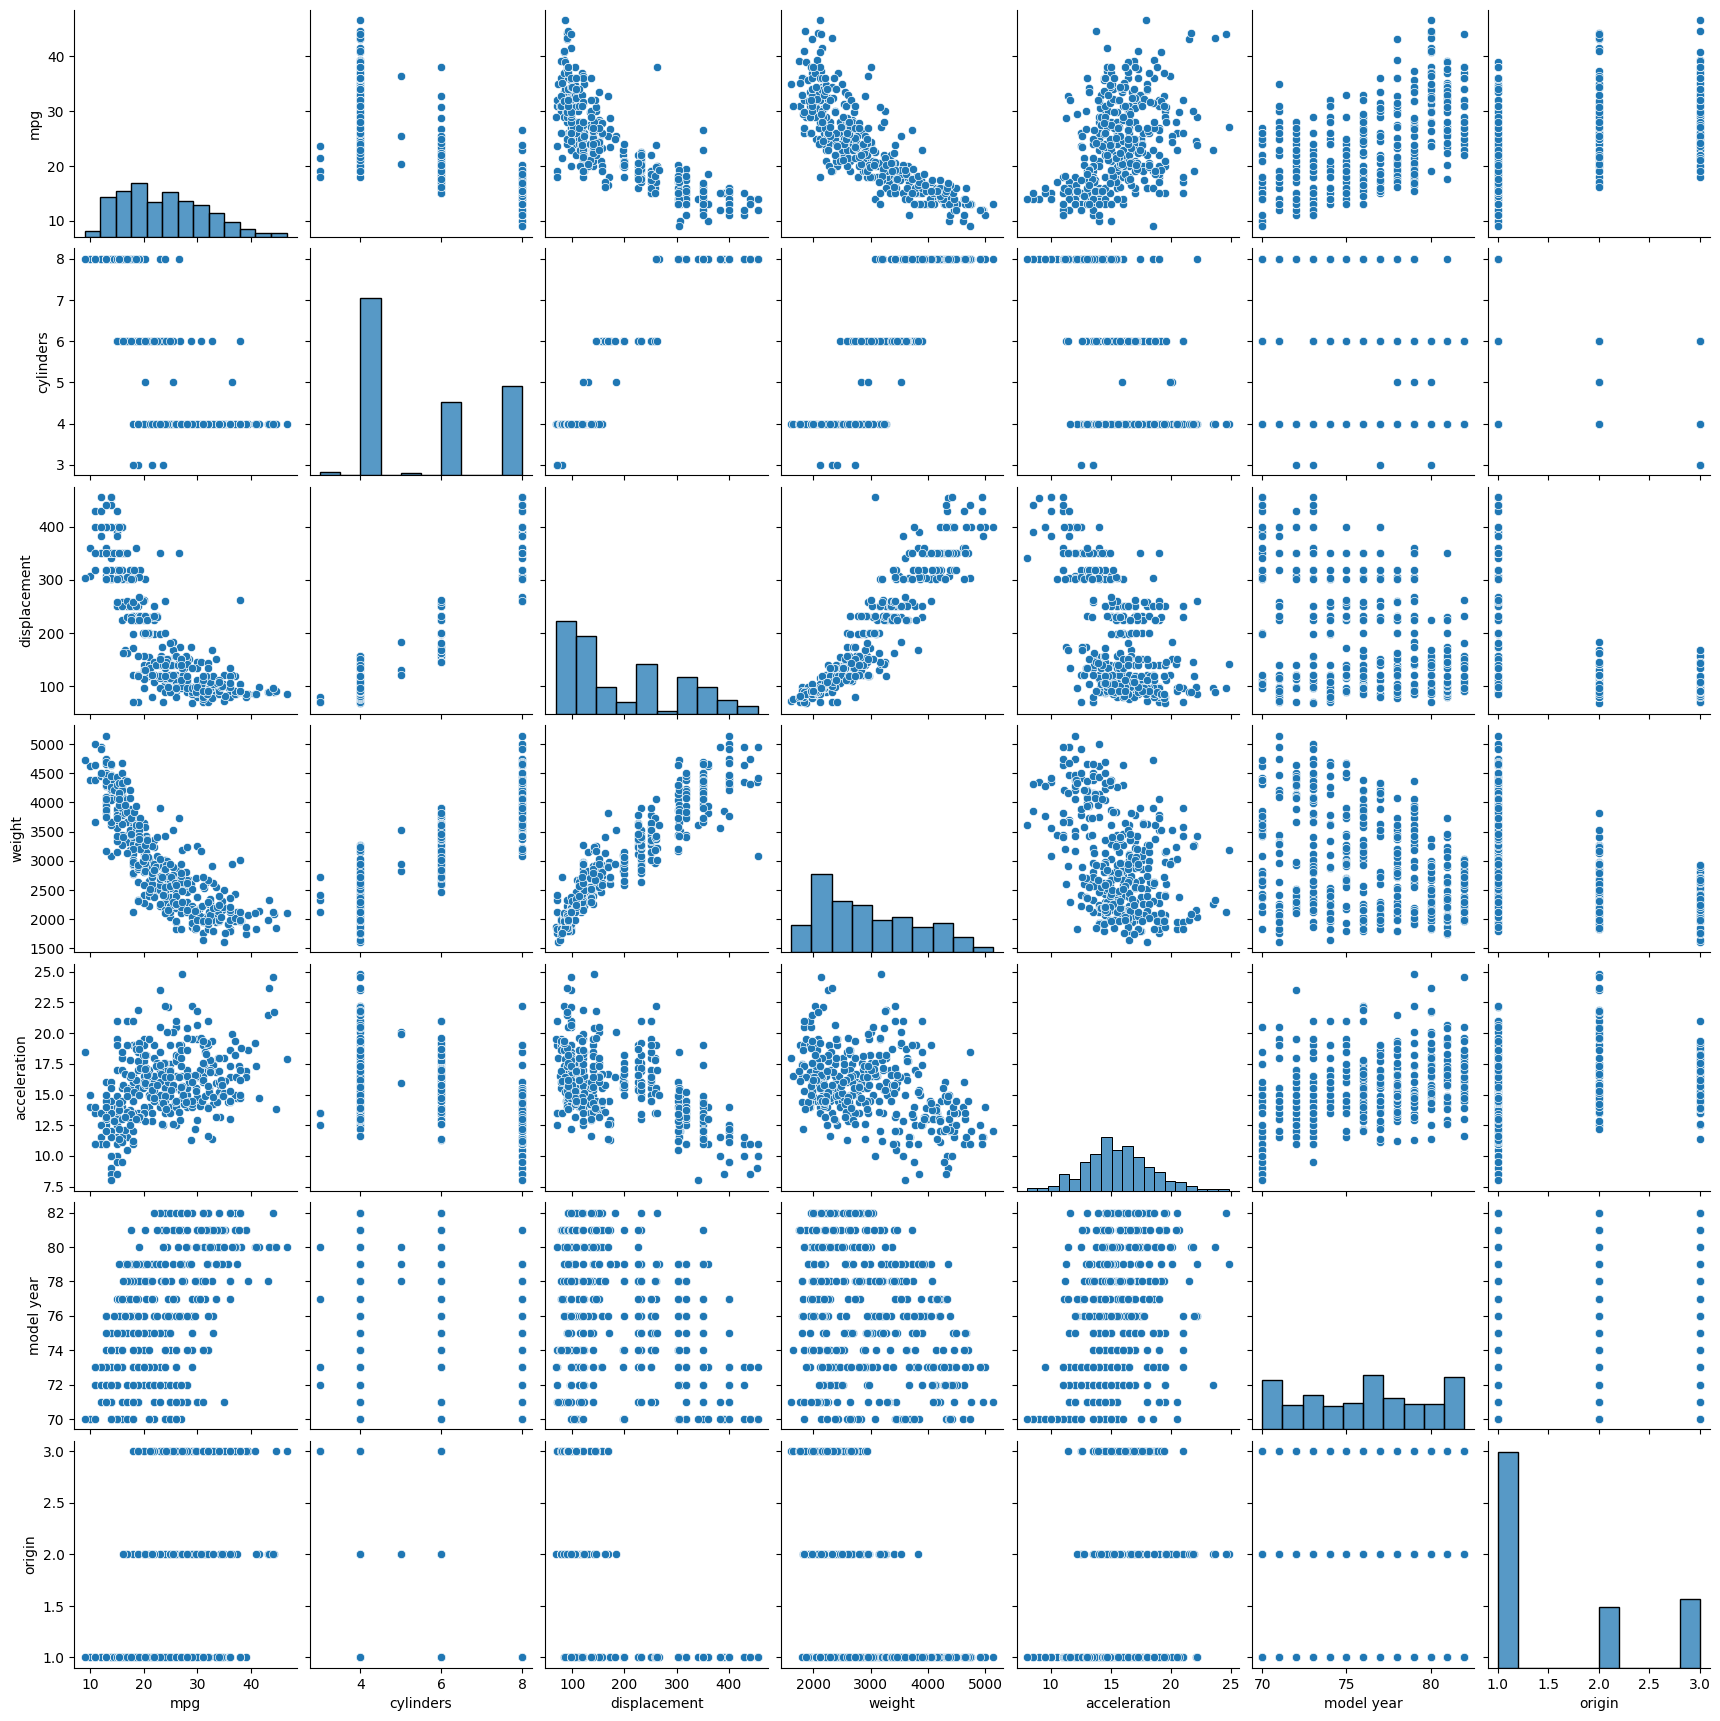

In [10]:
sns.pairplot(df)

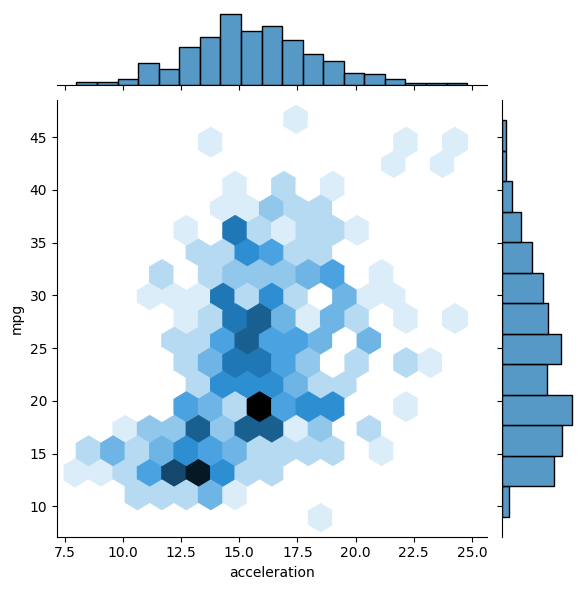

In [13]:
sns.jointplot(y="mpg", x="acceleration", data= df, kind='hex')

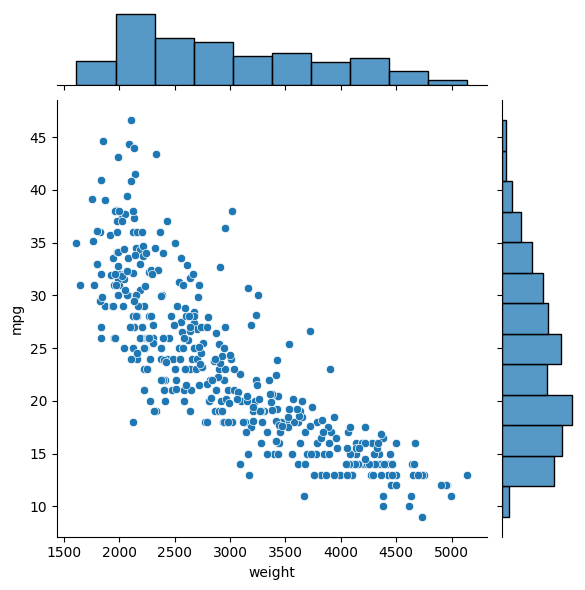

In [16]:
sns.jointplot(x="weight", y="mpg", data= df)

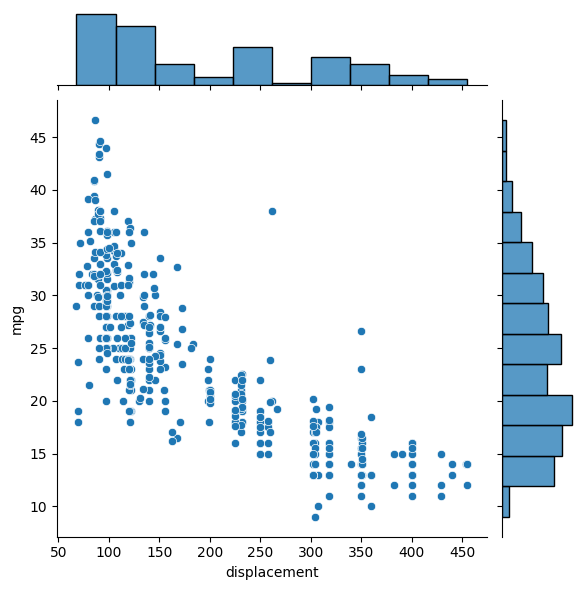

In [17]:
sns.jointplot(x='displacement', y='mpg', data= df)

In [19]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [31]:
x= df[[ 'cylinders', 'displacement', 'weight','acceleration', 'model year', 'origin']]
y = df['mpg']

In [32]:
x_train,x_test, y_train , y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [33]:
ml= LinearRegression()

In [34]:
ml.fit(x_train, y_train)

LinearRegression()

In [35]:
ml.coef_

array([ 0.03773219,  0.00653321, -0.00660047,  0.1490909 ,  0.79186036,
        1.47147477])

In [36]:
ml.predict(x_test)

array([32.92571596, 29.62390924, 20.82631606, 16.83254052, 12.69043749,
       27.65014808, 27.84246027,  9.67863624, 17.31814521, 21.99848428,
       12.44508482, 36.19697976, 25.42957091, 13.78609312, 23.7289843 ,
        6.3449641 , 29.54384897, 24.13963758, 15.99890126, 36.55161375,
       23.84631285, 18.87155987, 28.46353975, 28.74859081, 14.70840963,
       35.10689907, 25.73889814, 24.7204464 , 21.7303269 ,  8.51226345,
       28.21822293, 34.76269015, 20.30738504, 26.4307046 , 34.43289477,
       12.21008701, 23.12534681, 21.73057245, 12.55143508, 26.9834711 ,
       26.32519923, 27.51526569, 20.53909561,  8.01972753, 24.82243862,
       35.02480546, 26.55012893, 24.4949094 , 22.97464624, 27.69666388,
       22.53604823, 33.75254608, 32.87081891, 10.91503142, 27.69918089,
        9.69686034, 19.45269832, 30.04478066, 22.96469801, 20.23700052,
       16.15975243, 32.14876469, 23.8805989 , 20.97439521, 20.85305291,
       25.74523147, 24.99179795, 32.15877368, 28.29365205, 12.66

In [37]:
ml.score(x_test, y_test)

0.8378259160027899

In [39]:
ml.intercept_

np.float64(-23.16188172813237)

In [40]:
ml.fit_intercept

True

/tmp/ipython-input-1751082948.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-ml.predict(x_test))


<Axes: xlabel='mpg', ylabel='Density'>

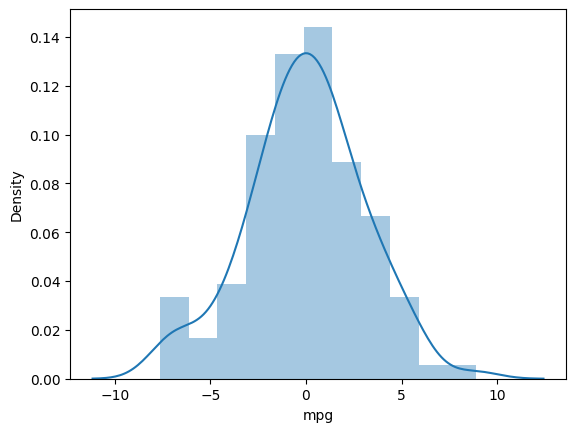

In [41]:
sns.distplot(y_test-ml.predict(x_test))

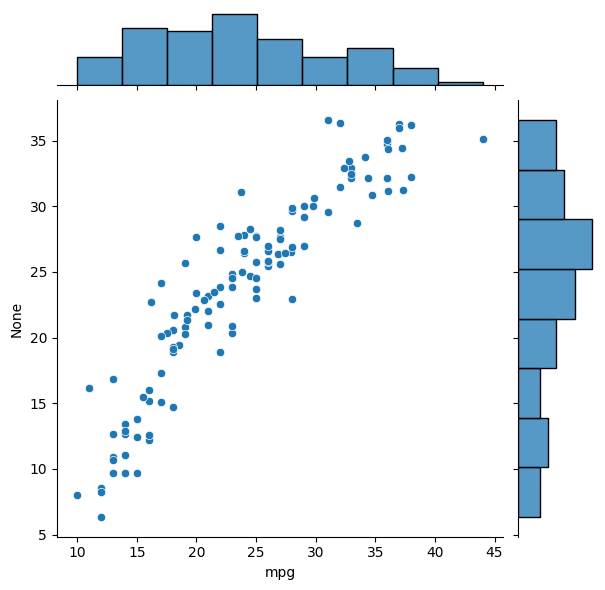

In [43]:
sns.jointplot(x =y_test,y= ml.predict(x_test))

In [44]:
mean_absolute_error(y_test, ml.predict(x_test))

2.367026000411521

In [45]:
mean_squared_error(y_test, ml.predict(x_test))

9.30739186803112